In [1]:
import csv
from collections import defaultdict
from operator import itemgetter

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {}
# obtained by copy and pasting https://www.basketball-reference.com/leagues/NBA_2019_advanced.html into a file
with open('2019_data.tsv') as dataf:
    reader = csv.DictReader(dataf, delimiter='\t')
    for row in reader:
        data[row['Player']] = row
        
print(data['Kemba Walker'])

OrderedDict([('Rk', '17'), ('Player', 'Kemba Walker'), ('Pos', 'PG'), ('Age', '28'), ('Tm', 'CHO'), ('G', '82'), ('MP', '2863'), ('PER', '21.7'), ('TS%', '.558'), ('3PAr', '.434'), ('FTr', '.267'), ('ORB%', '1.9'), ('DRB%', '11.9'), ('TRB%', '6.8'), ('AST%', '29.4'), ('STL%', '1.7'), ('BLK%', '1.0'), ('TOV%', '10.1'), ('USG%', '31.5'), (' ', ''), ('OWS', '5.5'), ('DWS', '1.9'), ('WS', '7.4'), ('WS/48', '.123'), ('OBPM', '5.1'), ('DBPM', '-1.7'), ('BPM', '3.3'), ('VORP', '3.9')])


In [42]:
data_byteam = defaultdict(list)
for player in data.values():
    if int(player['MP']) > 500:
        data_byteam[player['Tm']].append(player)
        
# players on "TOT" were traded during the season. We will figure out something better to do with them, 
# but for now, dump them:
del(data_byteam["TOT"])

print([(p['Player'], p['VORP']) for p in data_byteam['CHO']])

[('Kemba Walker', '3.9'), ('Nicolas Batum', '1.7'), ('Marvin Williams', '1.3'), ('Jeremy Lamb', '1.2'), ('Cody Zeller', '1.2'), ('Miles Bridges', '0.6'), ('Willy Hernangómez', '0.4'), ('Bismack Biyombo', '0.2'), ('Frank Kaminsky', '0.2'), ('Michael Kidd-Gilchrist', '0.2'), ('Dwayne Bacon', '-0.3'), ("Devonte' Graham", '-0.4'), ('Malik Monk', '-0.6'), ('Tony Parker', '-0.8')]


In [30]:
print(len(data_byteam))

30


In [5]:
cho = [float(p['VORP']) for p in data_byteam['CHO']]
cho

[3.9, 1.7, 1.3, 1.2, 1.2, 0.6, 0.4, 0.2, 0.2, 0.2, -0.3, -0.4, -0.6, -0.8]

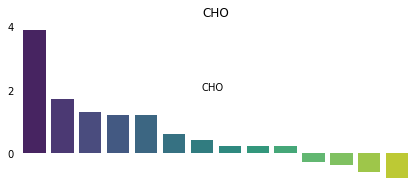

In [9]:
f, ax = plt.subplots(figsize=(7, 3))
ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_tick_parameters
ax.get_yaxis().set_ticks_position('none') 
ax.set_yticks([0,2,4,6,8])
sns.despine(left=True, right=True, bottom=True, top=True)
ax.text(6, 2, "CHO")
sns.barplot(y=cho, x=list(range(len(cho))), ax=ax, palette="viridis")


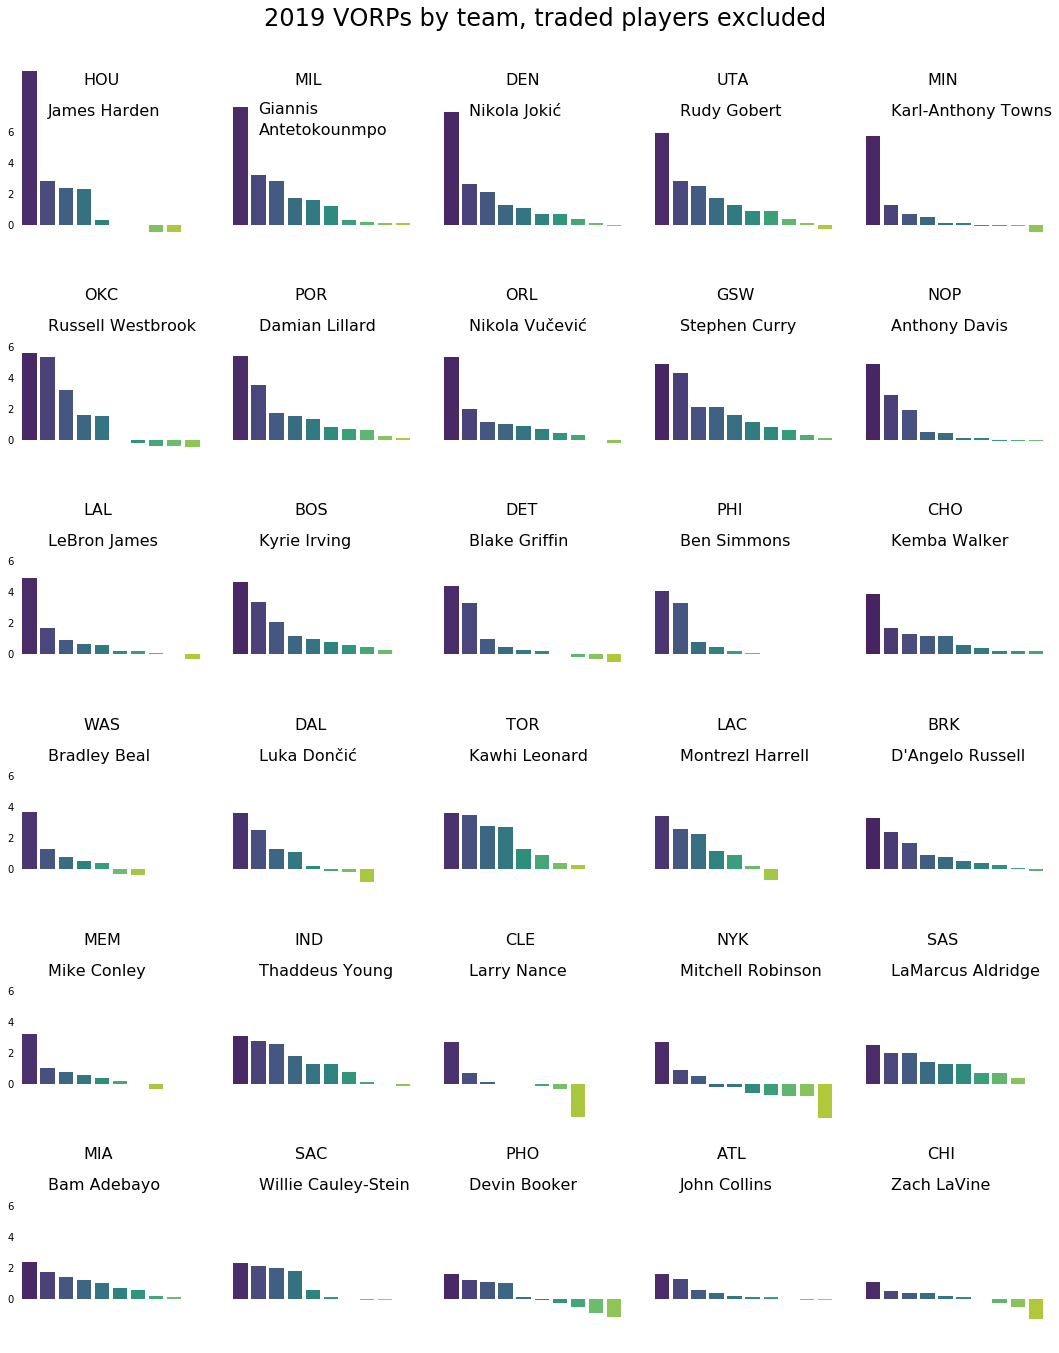

In [71]:
def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

font = {'weight': 'normal', 'size': 16, 'linespacing': 1.5}

f, axes = plt.subplots(6, 5, figsize=(15,19), sharex=True, sharey=True)
axes = trim_axs(axes, len(data_byteam))
for (teamname, team), ax in zip(data_byteam.items(), axes.flat):
    vorps = [float(p['VORP']) for p in team]
    xindex = list(range(len(team)))
    sns.barplot(y=vorps, x=list(range(len(team))), ax=ax, palette="viridis")
    #ax.set_title(teamname)
    ax.set_yticks([0,2,4,6])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_ticks_position('none')
    ax.text(3, 9, teamname, fontdict=font)
    best = team[0]['Player']
    if 'Giannis' in best:
        best = '\n'.join(best.split())
        ax.text(1, 5.8, best, fontdict=font)
    else:
        ax.text(1, 7, best, fontdict=font)
plt.tight_layout(pad=0.2)
sns.despine(left=True, right=True, bottom=True, top=True)
plt.subplots_adjust(top=0.94)
f.suptitle('2019 VORPs by team, traded players excluded', fontsize=24)
plt.savefig('graph.png')

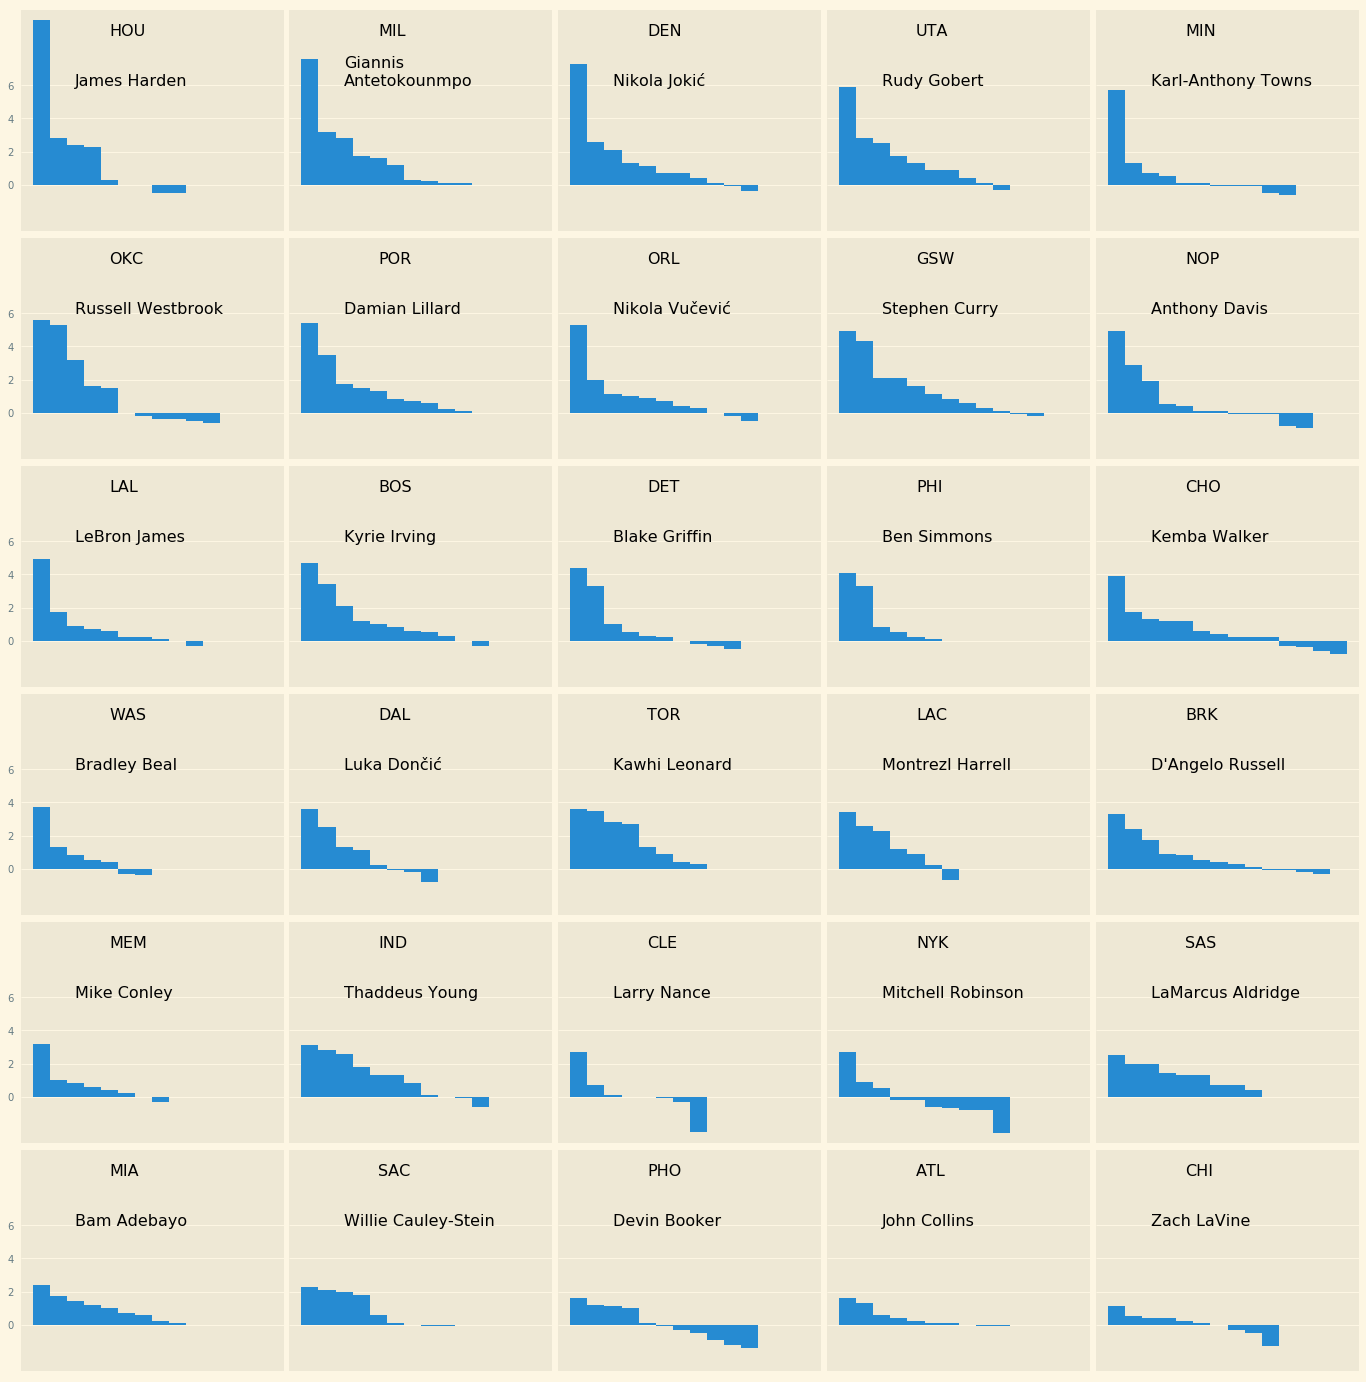

In [44]:
def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

font = {'weight': 'normal', 'size': 16}

with plt.style.context('Solarize_Light2'):
    f, axes = plt.subplots(6,5, figsize=(19,19), sharex=True, sharey=True)
    axes = trim_axs(axes, len(data_byteam))
    for (teamname, team), ax in zip(data_byteam.items(), axes.flat):
        vorps = [float(p['VORP']) for p in team]
        xindex = list(range(len(team)))
        ax.bar(xindex, vorps, width=1)
        #ax.set_title(teamname)
        ax.set_yticks([0,2,4,6])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_ticks_position('none')
        ax.text(4, 9, teamname, fontdict=font)
        best = team[0]['Player']
        if 'Giannis' in best:
            best = '\n'.join(best.split())
        ax.text(2, 6, best, fontdict=font)
plt.tight_layout(pad=0, h_pad=0)
sns.despine(left=True, right=True, bottom=True, top=True)

In [18]:
print([p['Player'] for p in data_byteam["TOT"]])

['Marc Gasol', 'Jimmy Butler', 'DeAndre Jordan', 'Tobias Harris', 'Delon Wright', 'Enes Kanter', 'Robert Covington', 'Otto Porter', 'Trevor Ariza', 'Jonas Valančiūnas', 'Justin Holiday', 'Wayne Ellington', 'Boban Marjanović', 'Nikola Mirotić', 'Reggie Bullock', 'Dario Šarić', 'Landry Shamet', 'Ivica Zubac', 'James Ennis', 'Tyler Johnson', 'Mike Muscala', 'Garrett Temple', 'Wilson Chandler', 'George Hill', 'Thon Maker', 'Wesley Matthews', 'Corey Brewer', 'Michael Carter-Williams', 'Tyson Chandler', 'Kenneth Faried', 'Pau Gasol', 'JaMychal Green', 'Justin Jackson', 'Kyle Korver', 'Iman Shumpert', 'Patrick McCaw', 'Jabari Parker', 'Trey Burke', 'Alec Burks', 'Sam Dekker', 'Henry Ellenson', 'Tim Frazier', 'Courtney Lee', 'Kelly Oubre', 'Christian Wood', 'Harrison Barnes', 'Tim Hardaway', 'Rodney Hood', 'Stanley Johnson', 'Greg Monroe', 'Mike Scott', 'Dennis Smith', 'Tyler Dorsey', 'John Jenkins', 'Wesley Johnson', 'Jeremy Lin', 'C.J. Miles', 'Markieff Morris', 'Cameron Payne', 'Bobby Porti